In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
data = pd.read_csv(r'/content/German Bank Credit Customer Segmentation.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [47]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [48]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [50]:
data.isnull().sum().sort_values(ascending=False)

,0
Checking account,394
Saving accounts,183
Age,0
Job,0
Sex,0
Housing,0
Credit amount,0
Duration,0
Purpose,0


In [51]:
data['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [52]:
data['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


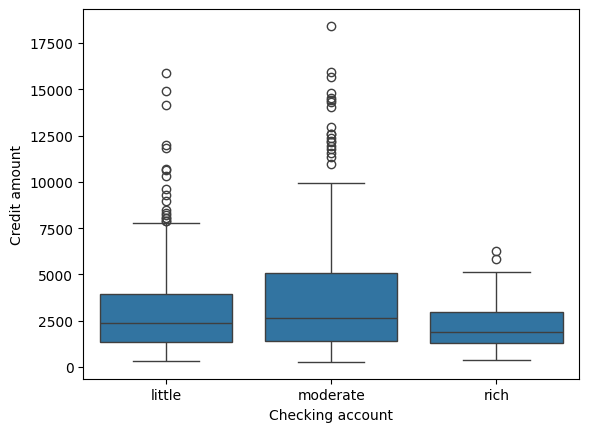

In [53]:
sns.boxplot(x="Checking account", y="Credit amount", data=data)
plt.show()

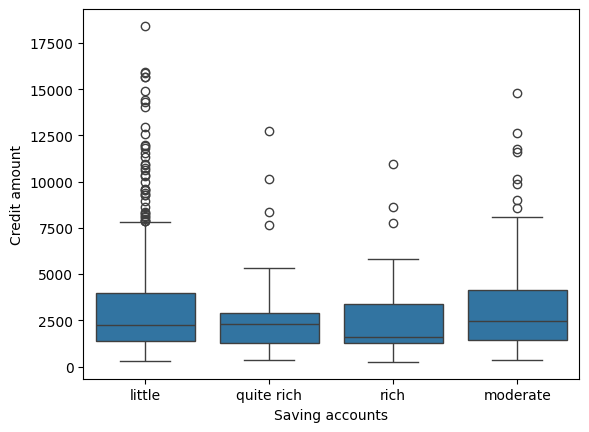

In [54]:
sns.boxplot(x="Saving accounts", y="Credit amount", data=data)
plt.show()

In [55]:

data['Credit_bin1'] = pd.qcut(data['Credit amount'], q=3, labels=["little", "moderate", "rich"])

data['Checking account'] = data['Checking account'].fillna(data['Credit_bin1'])

data['Credit_bin2'] = pd.qcut(data['Credit amount'], q=4, labels=["little", "moderate","quite rich","rich"])

data['Saving accounts'] = data['Saving accounts'].fillna(data['Credit_bin2'])

data.drop(columns=['Credit_bin1','Credit_bin2'], inplace=True)

In [56]:
data.isnull().sum().sort_values(ascending=False)

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [57]:
data['Checking account'].value_counts()

,count
Checking account,
moderate,411
little,403
rich,186


In [58]:
data['Saving accounts'].value_counts()

,count
Saving accounts,
little,644
moderate,138
rich,110
quite rich,108


In [59]:
data.duplicated().sum()

np.int64(0)

In [60]:
account_mapping1 = {
    'little': 1,
    'moderate': 2,
    'rich': 3
}

account_mapping2 = {
    'little': 1,
    'moderate': 2,
    'quite rich': 3,
    'rich': 4
}

data['Saving accounts'] = data['Saving accounts'].map(account_mapping2)

data['Checking account'] = data['Checking account'].map(account_mapping1)

In [61]:
data['Checking account'].value_counts()

,count
Checking account,
2,411
1,403
3,186


In [62]:
data['Saving accounts'].value_counts()

,count
Saving accounts,
1,644
2,138
4,110
3,108


In [63]:
data['Housing'].value_counts()

,count
Housing,
own,713
rent,179
free,108


In [64]:
data['Purpose'].value_counts()

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


In [65]:
data['Sex'].value_counts()

,count
Sex,
male,690
female,310


In [66]:
data = pd.get_dummies(columns=['Housing','Sex','Purpose'], data=data , drop_first=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Saving accounts              1000 non-null   int64
 3   Checking account             1000 non-null   int64
 4   Credit amount                1000 non-null   int64
 5   Duration                     1000 non-null   int64
 6   Housing_own                  1000 non-null   bool 
 7   Housing_rent                 1000 non-null   bool 
 8   Sex_male                     1000 non-null   bool 
 9   Purpose_car                  1000 non-null   bool 
 10  Purpose_domestic appliances  1000 non-null   bool 
 11  Purpose_education            1000 non-null   bool 
 12  Purpose_furniture/equipment  1000 non-null   bool 
 13  Purpose_radio/TV             1000 non-null   bool

In [68]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)

In [71]:
principalDf.head()

,0,1
0,-1.381144,-2.009799
1,0.868793,-0.423288
2,-0.981159,-1.053453
3,1.308346,1.177942
4,0.845757,0.579833


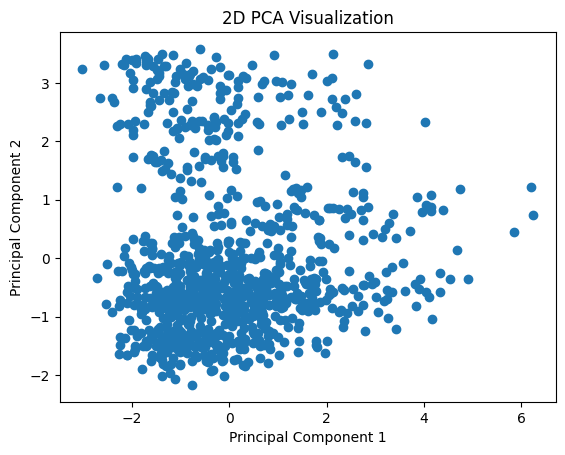

In [72]:
plt.scatter(principalDf[0], principalDf[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()

**K-Means**

In [81]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init="k-means++", random_state=42)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)

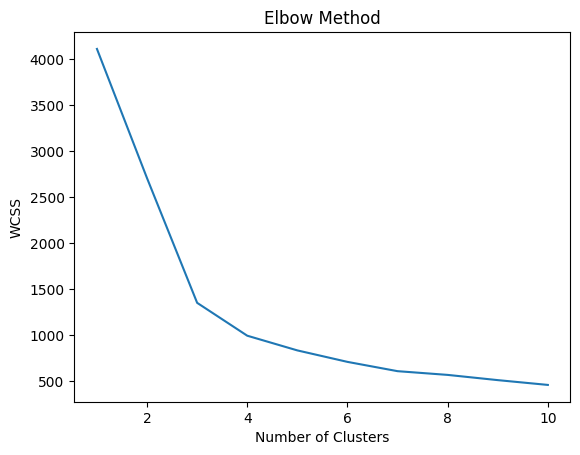

In [82]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [84]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,init="k-means++", random_state=42)
    kmeans.fit(principalDf)
    scores.append(silhouette_score(principalDf, kmeans.labels_))

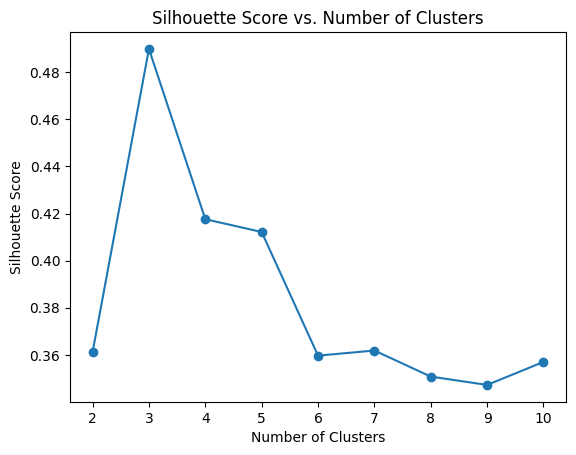

In [85]:
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=3,init="k-means++", random_state=42)
labels_km  = kmeans.fit_predict(principalDf)

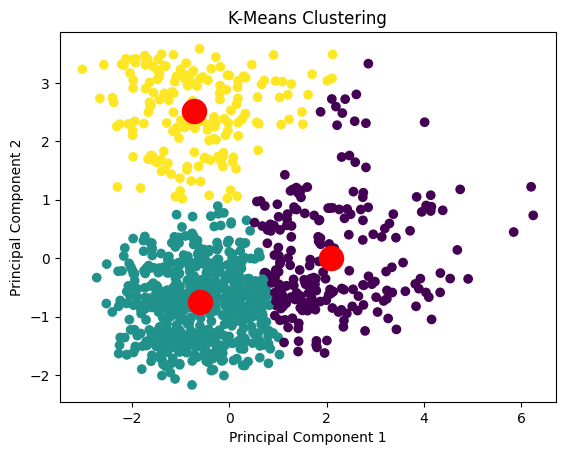

In [87]:
plt.scatter(principalDf[0], principalDf[1], c=labels_km)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

**Hierarchical Clustering**

Text(0, 0.5, 'Euclidean distances')

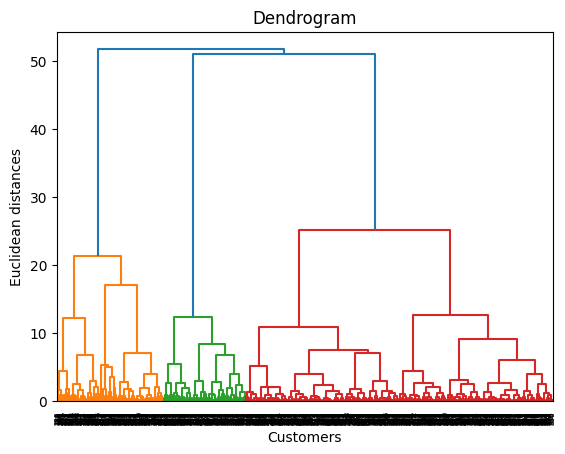

In [89]:
dendrogram(linkage(principalDf, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [93]:
hierarchy = AgglomerativeClustering(n_clusters=3)
labels_hc = hierarchy.fit_predict(principalDf)

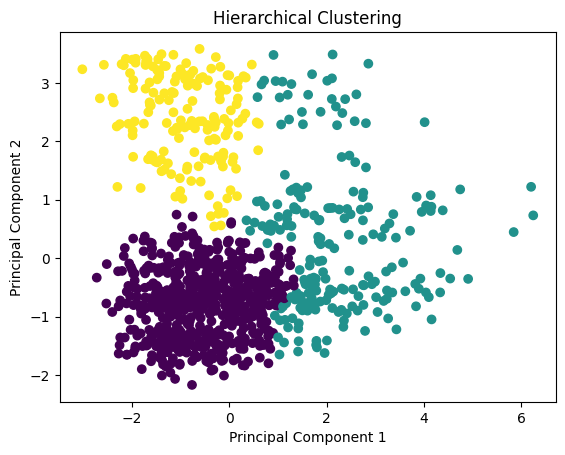

In [97]:
plt.scatter(principalDf[0], principalDf[1], c=labels_hc)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.show()